In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [253]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    plt.rcParams['font.family'] = font_name
# 맥
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    plt.rc('font', family='NanumBarunGothic')

# 0. 파일 불러오기

In [254]:
data1 = pd.read_csv('data/join_lpoint/purchase_customer_category_br_info.csv', encoding='cp949', parse_dates=[6])
data2 = pd.read_csv('data/join_lpoint/cop_customer_br_info.csv', encoding='cp949', parse_dates=[5, 6])

In [326]:
lpay_cust = pd.read_csv('data/lpay_customer_info.csv', index_col=0, parse_dates=[5])
lpay_cust

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,ma_fem_dv,ages,zon_hlv
0,M629656521,210803210311226,A03,1,2021-08-03,21,10900,남성,40대,Z04
1,M216016456,210803130167542,L01,2,2021-08-03,13,6860,여성,40대,Z04
2,M205142844,210803140275112,A02,1,2021-08-03,14,9000,여성,60대,Z17
3,M737010483,210803040637594,A06,2,2021-08-03,4,36740,남성,40대,Z16
4,M707775545,210803140675502,A06,2,2021-08-03,14,138500,남성,30대,Z11
...,...,...,...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,2021-01-25,11,51800,여성,50대,Z16
353180,M470112503,210104210652271,A06,2,2021-01-04,21,6440,여성,50대,Z16
353181,M748878049,210119200278240,A02,1,2021-01-19,20,17600,여성,30대,Z10
353182,M748878049,210119180267206,A02,1,2021-01-19,18,12400,여성,30대,Z10


# 1. L.POINT 데이터

<AxesSubplot:xlabel='ma_fem_dv', ylabel='count'>

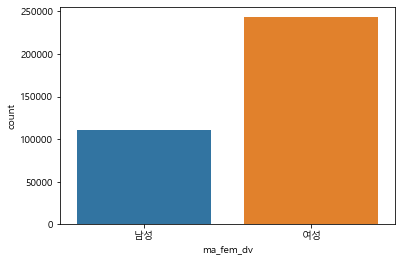

In [256]:
sns.countplot(data=lpay_cust, x='ma_fem_dv')

<AxesSubplot:xlabel='ages', ylabel='count'>

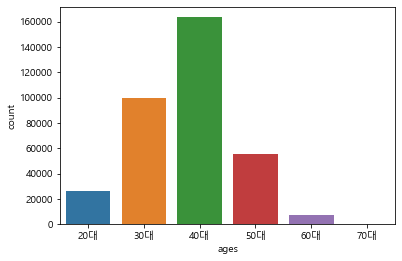

In [257]:
idx = [f'{x}0대' for x in range(2, 8)]
sns.countplot(data=lpay_cust, x='ages', order=idx)

In [258]:
am_idx = ['천 원 미만', '천 원대', '만 원대', '10만 원대', '100만 원대', '천 만 원 이상']

def cut_amount(x):
    if x < 1000:
        out = am_idx[0]
    elif 1000 <= x < 10000:
        out = am_idx[1]
    elif 10000 <= x < 100000:
        out = am_idx[2]
    elif 100000 <= x < 1000000:
        out = am_idx[3]
    elif 1000000 <= x < 10000000:
        out = am_idx[4]
    else:
        out = am_idx[5]
    return out

In [259]:
lpay_cust['금액대'] = lpay_cust['buy_am'].apply(cut_amount)

<AxesSubplot:xlabel='금액대', ylabel='count'>

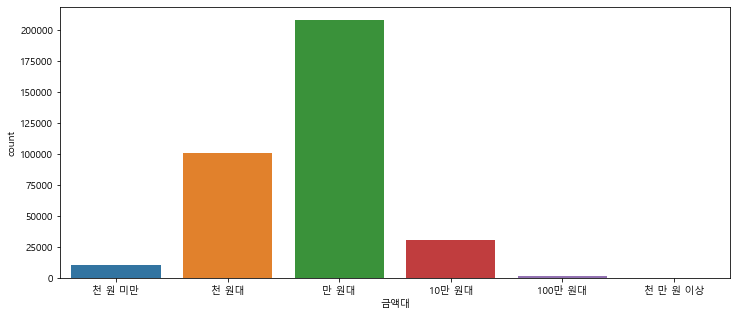

In [260]:
plt.figure(figsize=(12, 5))
sns.countplot(data=lpay_cust, x='금액대', order=am_idx)

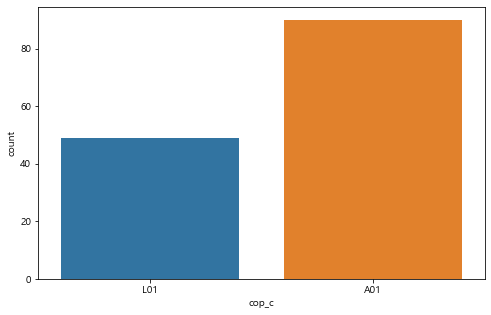

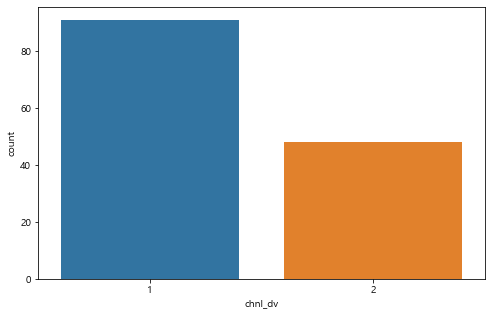

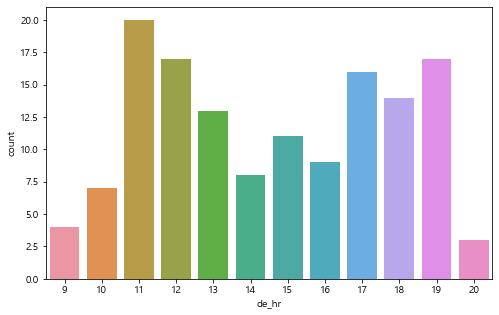

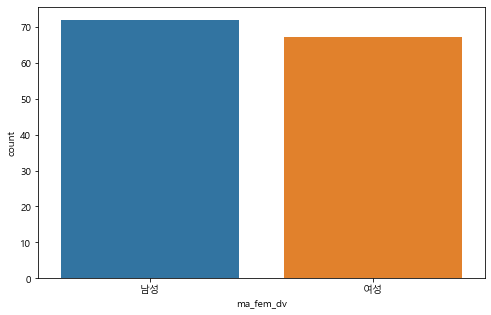

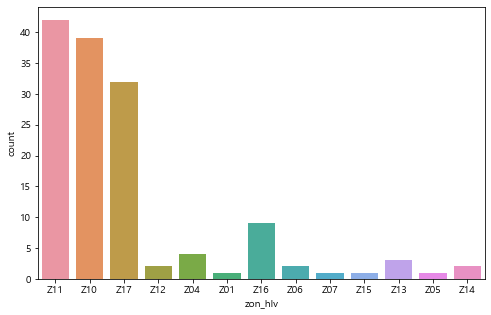

In [261]:
# 1000만 원 이상 LPay 이용
for i in [2, 3, 5, 7, 9]:
    x = lpay_cust.columns[i]
    plt.figure(figsize=(8, 5))
    sns.countplot(data=lpay_cust.loc[lpay_cust['금액대']=='천 만 원 이상'], x=x)

- 전체 데이터 대비 1000만원 이상 __기타제휴사__  이용량이 많다.
- 오프라인이 많다.
- 점심, 저녁 시간대가 높다.
- 남성이 조금 높다.
- 전체에 비해 Z11 거주자가 많다.

# 2. LPOINT 사용 관련

In [327]:
# 장바구니 당 lpay 이용 여부 데이터 생성
df1 = data1[["고객 분류", "장바구니 식별 번호", "온/오프라인 구분", "제휴사 구분 코드", "구매 점포 구분 코드",
           "구매 일자", "DayofWeek", "구매 시간", "고객 성별", "고객 연령대", "고객 거주 지역 대분류 코드",
           "점포 지역 대분류 코드", "점포 지역 중분류 코드", "LPoint"]].drop_duplicates()
df1_lp_y = df1.loc[df1['LPoint']==1]
df1_lp_n = df1.loc[df1['LPoint']==0]

In [263]:
# pie 그래프 함수 정의
def pie(ax, data):
    df = data.value_counts()
    ax.pie(df, labels=df.index, autopct='%.1f%%')

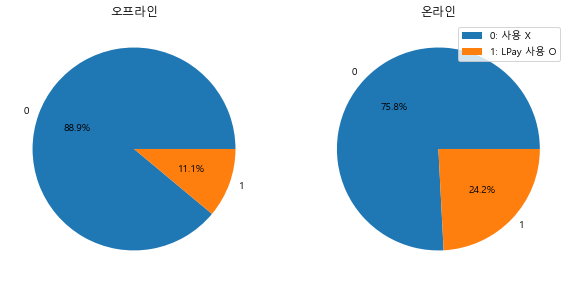

In [264]:
# 온/오프라인 비율
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

pie(ax1, df1.loc[df1['온/오프라인 구분']==1]['LPoint'])
pie(ax2, df1.loc[df1['온/오프라인 구분']==2]['LPoint'])

ax1.set_title('오프라인')
ax2.set_title('온라인')

ax2.legend(['0: 사용 X', '1: LPay 사용 O'])

plt.show()

- 유통부문에서 __온라인__ 일 때 LPay 이용 비중이 높다.

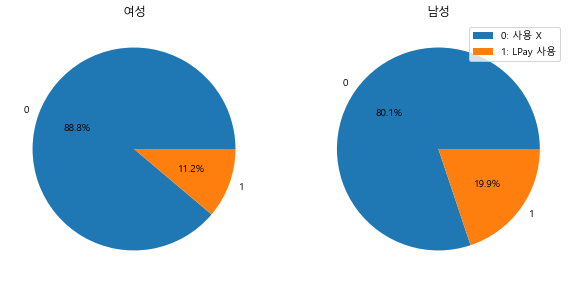

In [265]:
# 고객 성별 비율
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

pie(ax1, data1.loc[data1['고객 성별']=='여성']['LPoint'])
pie(ax2, data1.loc[data1['고객 성별']=='남성']['LPoint'])

ax1.set_title('여성')
ax2.set_title('남성')

ax2.legend(['0: 사용 X', '1: LPay 사용'])

plt.show()

- 유통부문에서 __남성__ 일 때 LPay 사용 비중이 높다.

In [266]:
# 연령대별 확률 계산 함수
def per_age(data, age):
    df = data.groupby('고객 연령대').get_group(name=age)['LPoint'].value_counts()
    return (df/df.sum()).to_frame(name=f'{age}')

In [267]:
# barh - 연령대별
def barh_age(data):
    df = pd.concat([per_age(data, '20대'), per_age(data, '30대'), per_age(data, '40대'), per_age(data, '50대'), per_age(data, '60대'), per_age(data, '70대')], axis=1)
    plt.barh(df.columns, df.iloc[0])
    plt.barh(df.columns, df.iloc[1], left=df.iloc[0])

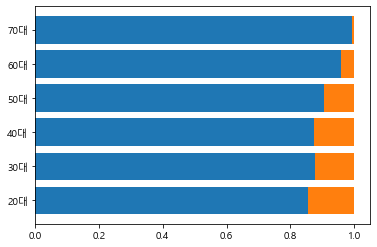

In [268]:
barh_age(df1.loc[df1['고객 성별']=='여성'])

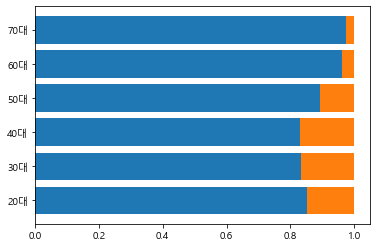

In [269]:
barh_age(df1.loc[df1['고객 성별']=='남성'])

- 여성의 경우 20대의 LPay 이용 비중이 가장 높았고, 남성의 경우 30, 40대가 높았다.

### 날짜

In [270]:
# 추이 함수
def date_counter(data, col):
    df = data[col].value_counts().sort_index()
    sns.lineplot(data=df)

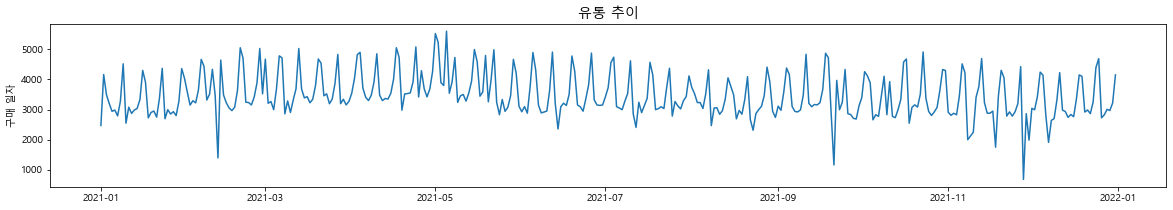

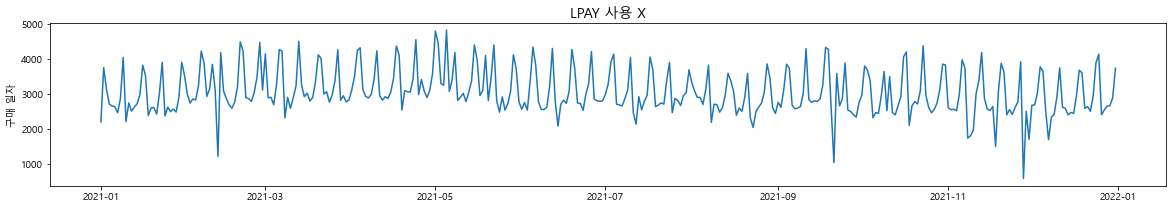

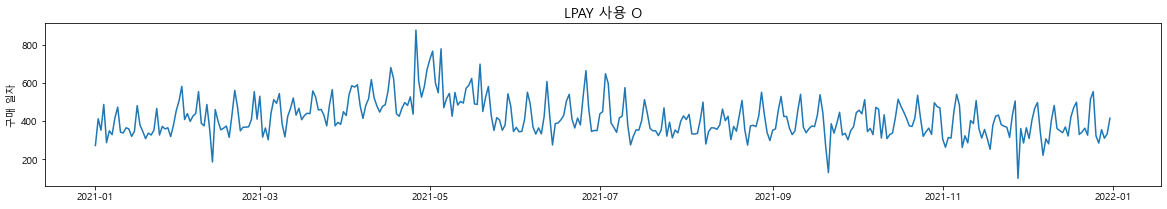

In [271]:
plt.figure(figsize=(20, 3))
plt.title('유통 추이', fontsize=14)
date_counter(df1, '구매 일자')

plt.figure(figsize=(20, 3))
plt.title('LPAY 사용 X', fontsize=14)
date_counter(df1_lp_n, '구매 일자')

plt.figure(figsize=(20, 3))
plt.title('LPAY 사용 O', fontsize=14)
date_counter(df1_lp_y, '구매 일자')

In [272]:
# 구매량 기준 날짜 추출 함수
def show_date(data, ud, criterion):
    df = data['구매 일자'].value_counts().to_frame()
    if ud == 'up':
        return df.loc[df['구매 일자']>criterion].sort_index()
    if ud == 'down':
        return df.loc[df['구매 일자']<criterion].sort_index()

In [273]:
# 유통업종 구매량이 상승되어있는 일자
show_date(df1, 'up', 5100)

,구매 일자
2021-05-01,5528
2021-05-02,5237
2021-05-05,5609


- 각각 토요일, 일요일, 어린이날

In [274]:
# 유통업종 LPAY 사용량이 800건 이상인 일자
show_date(df1_lp_y, 'up', 800)

,구매 일자
2021-04-26,877


- 전체 구매량과 상이한 패턴이 나타난 날짜는 __4월 26일__

In [275]:
# 4월 26일 LPoint 사용 데이터
df_426 = data1.loc[(data1['구매 일자']=='2021-04-26')&(data1['LPoint']==1)]

In [276]:
# 4월 26일 구매 상품명 상위 10개
df_426['상품명'].value_counts().sort_values(ascending=False)[:10]

패스트푸드           341
식음료모바일상품권        84
기타남성의류세트         68
백화점/마트모바일상품권     56
생수               50
일반우유             46
복사용지             36
감자스낵             31
콜라               29
탄산수              29
Name: 상품명, dtype: int64

- 4월 26일 __패스트푸드__ 의 LPAY 사용량이 크게 증가
- 식음료, 백화점/마트 모바일상품권

In [277]:
df_426['제휴사 구분 코드'].value_counts().sort_values(ascending=False)[:10]

A06    1357
A02     499
A01     354
A04     350
A03     262
A05       2
Name: 제휴사 구분 코드, dtype: int64

In [278]:
data1.loc[data1['제휴사 구분 코드']=='A06']['온/오프라인 구분'].value_counts()

2    97915
Name: 온/오프라인 구분, dtype: int64

- 제휴사 __A06__ 에 대한 구매량 증가
- A06은 온라인

In [279]:
# 날짜 슬라이싱 함수
def dates(data, start, end):
    df = data.loc[(data['구매 일자']>=f'2021-{start}')&(data['구매 일자']<f'2021-{end}')]
    return df

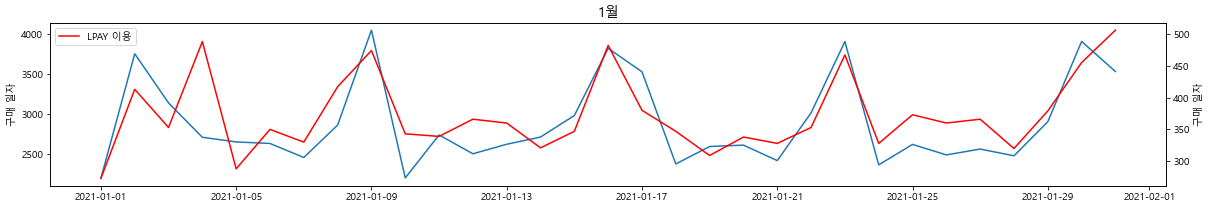

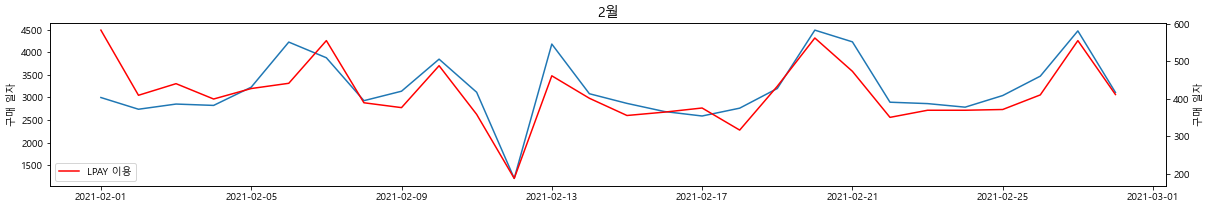

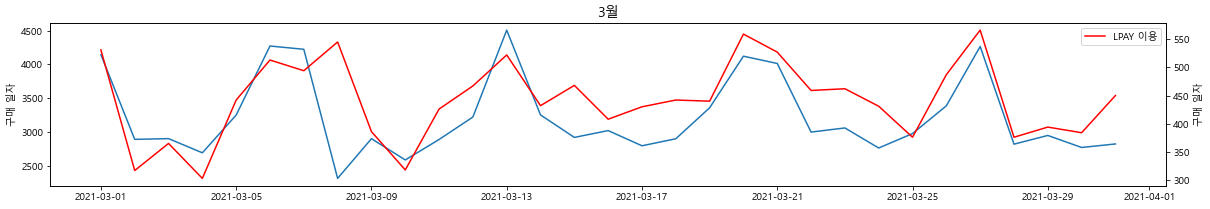

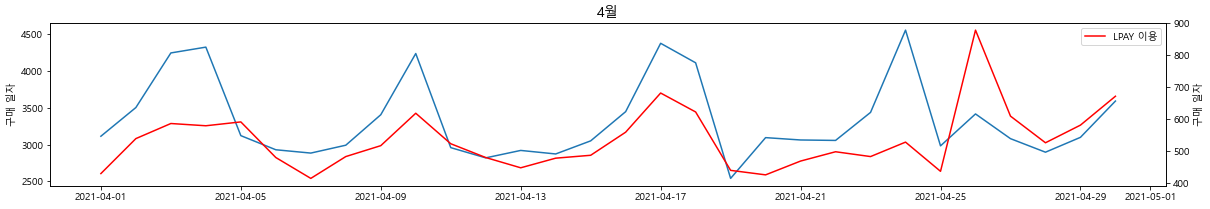

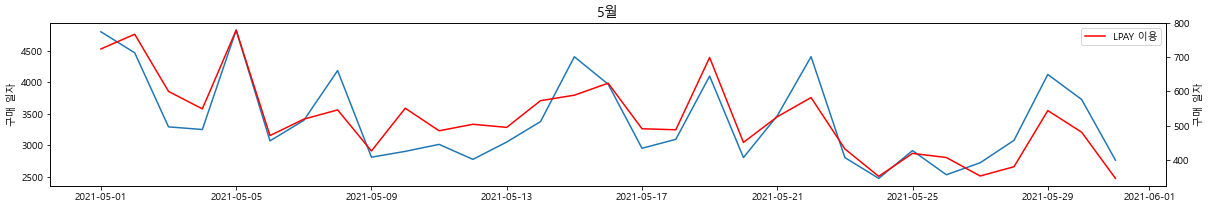

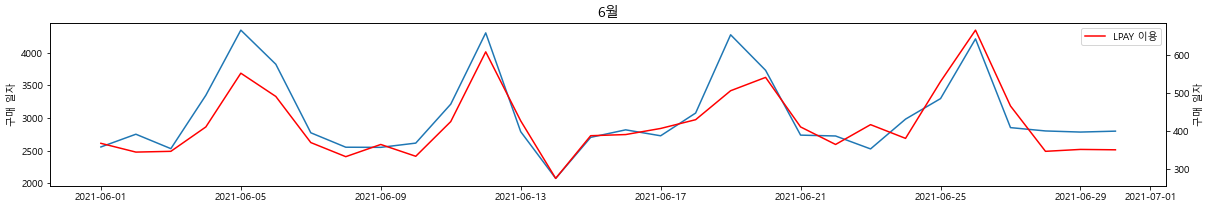

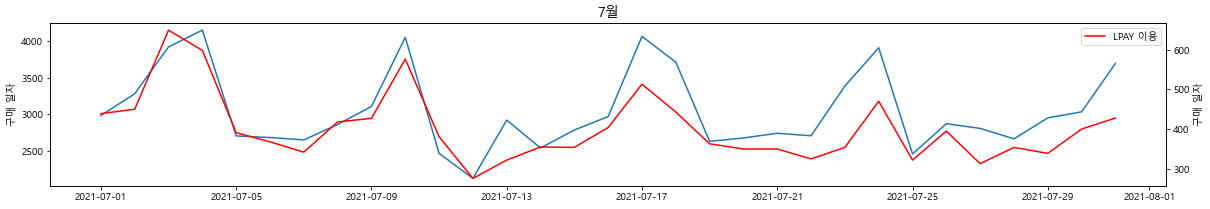

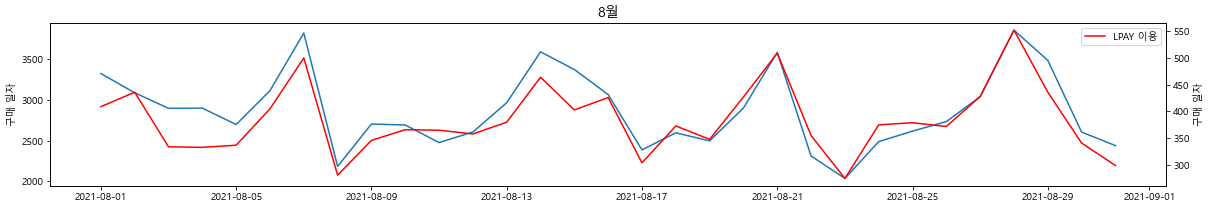

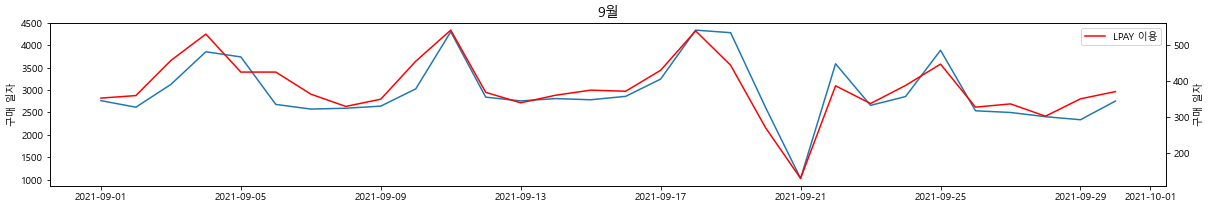

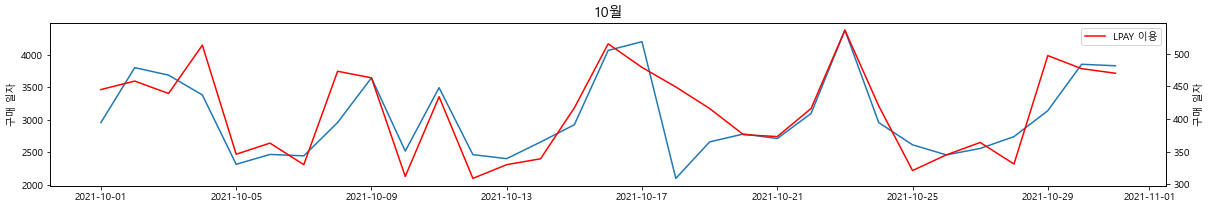

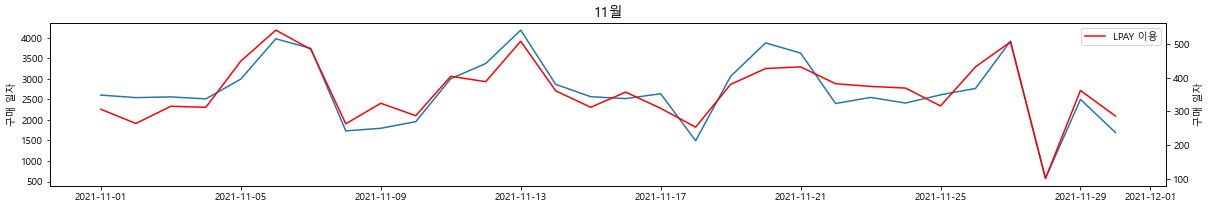

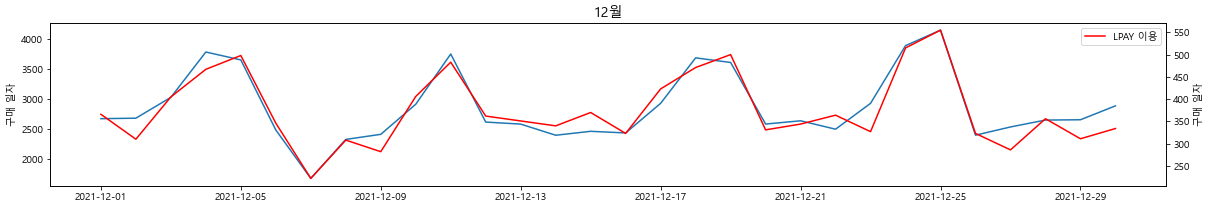

In [280]:
# 월 별 추이
for m in range(1, 13):
    if m == 12:
        df = dates(df1, f'{m}-01', '12-31')
    else:
        df = dates(df1, f'{m}-01', f'{m+1}-01')

    plt.figure(figsize=(20, 3))
    plt.title(f'{m}월', fontsize=14)
    date_counter(df.loc[df['LPoint']==0], '구매 일자')
    plt.twinx()
    sns.lineplot(data=df.loc[df['LPoint']==1]['구매 일자'].value_counts().sort_index(), color='red', label='LPAY 이용')

- LPAY 이용 상승 일자: 2월1일, 4월26일, 5월10일
- 비슷한 패턴 일자: 5월2일, 5월16일, 6월20일, 12월5일

In [281]:
# 비슷한 패턴이 나타난 요일
con_date = (df1['구매 일자']=='2021-05-02')|(df1['구매 일자']=='2021-05-16')|(df1['구매 일자']=='2021-06-20')|(df1['구매 일자']=='2021-12-05')
df1_dw = df1.loc[con_date]
df1_dw['DayofWeek'].value_counts()

6    18250
Name: DayofWeek, dtype: int64

In [282]:
# lpay사용량은 증가하고 그 외 구매량은 감소한 일자
no_a = df1.loc[(df1['LPoint']==0)]['구매 일자'].value_counts().sort_index().to_frame().reset_index()
no_b = no_a.copy()
new = pd.DataFrame([['2019-12-31', 0]], columns=['index', '구매 일자'])
no_a = pd.concat([new, no_a], ignore_index=True)
no_b['증감률'] = (no_b['구매 일자']/no_a['구매 일자'])<1

yes_a = df1.loc[(df1['LPoint']==1)]['구매 일자'].value_counts().sort_index().to_frame().reset_index()
yes_b = yes_a.copy()
yes_a = pd.concat([new, yes_a], ignore_index=True)
yes_b['증감률'] = (yes_b['구매 일자']/yes_a['구매 일자'])>1

In [283]:
diff = pd.concat((yes_b[['증감률']], no_b[['증감률']]), axis=1, keys=['yes', 'no'])
idxs= diff.loc[(diff[('yes', '증감률')]==True)&(diff[('no', '증감률')]==True)].index

In [284]:
# 요일 비중 - 2: 수요일
yes_b.iloc[idxs]['index'].dt.dayofweek.value_counts()

2    14
0     9
1     8
6     8
3     5
Name: index, dtype: int64

In [285]:
yes_b.iloc[idxs]['index']

3     2021-01-04
5     2021-01-06
11    2021-01-12
30    2021-01-31
31    2021-02-01
37    2021-02-07
46    2021-02-16
47    2021-02-17
53    2021-02-23
66    2021-03-08
73    2021-03-15
75    2021-03-17
94    2021-04-05
103   2021-04-14
110   2021-04-21
111   2021-04-22
121   2021-05-02
131   2021-05-12
135   2021-05-16
151   2021-06-01
153   2021-06-03
159   2021-06-09
167   2021-06-17
170   2021-06-20
173   2021-06-23
179   2021-06-29
194   2021-07-14
208   2021-07-28
213   2021-08-02
216   2021-08-05
221   2021-08-10
227   2021-08-16
244   2021-09-02
257   2021-09-15
269   2021-09-27
271   2021-09-29
276   2021-10-04
285   2021-10-13
298   2021-10-26
319   2021-11-16
324   2021-11-21
338   2021-12-05
352   2021-12-19
355   2021-12-22
Name: index, dtype: datetime64[ns]

In [286]:
# Lpay 이용 구매 상품
def show_product(m, d, n):
    df = data1.loc[(data1['구매 일자']==f'2021-{m}-{d}')&(data1['LPoint']==1)]
    return df['상품명'].value_counts().sort_values(ascending=False)[:n]

In [287]:
# 1월 4일 상위 10개
show_product(1, 4, 10)

일반스낵         46
쿠키           30
기타여성의류아우터    25
여성재킷         24
기타파티/팬시용품    24
커피음료         22
남성청바지        22
일반계란         19
일반우유         18
두부류          17
Name: 상품명, dtype: int64

In [288]:
# 2월 1일 상위 10개
show_product(2, 1, 10)

홍삼정/분말/환     161
식음료모바일상품권     51
감자스낵          35
일반우유          33
한우선물세트        31
생수            29
어린이음료         21
바디케어세트        20
여성속옷세트        20
판초콜릿          17
Name: 상품명, dtype: int64

- 2월 1일, __홍삼정/분말/환__ 상품에 대한 Lpay 이용이 상승

In [289]:
# 3월 8일 Lpay 이용 구매 상품 상위 10개
show_product(3, 8, 10)

탁자           81
콜라           62
저장장치         57
탄산수          47
일반우유         46
남아티셔츠/탑      35
식음료모바일상품권    31
종량제봉투        24
크림/밤/오일      22
바아이스크림       20
Name: 상품명, dtype: int64

- 3월 8일: 탁자, 콜라, 저장장치

In [290]:
show_product(10, 4, 10)

놀이동산이용권        97
영화/문화모바일상품권    58
일반스낵           47
일반우유           43
콜라             40
디저트            33
국산맥주           32
일반빵            31
임대매출           30
국물용기라면         30
Name: 상품명, dtype: int64

- 10월 4일: __놀이동사이용권__, 영화/문화모바일상품권
- 10월 4일 월요일은 개천절의 대체휴일이다.

In [291]:
# Lpay 이용 상승 일요일 구매상품 상위 10개
show_product(5, 2, 10)

패스트푸드         62
일반스낵          62
생수            45
디저트           44
임대매출          38
국물용기라면        36
식음료모바일상품권     34
남성런닝/트레이닝화    31
냉장커피차음료       28
종량제봉투         28
Name: 상품명, dtype: int64

In [292]:
show_product(5, 16, 10)

기타남성의류세트     110
일반스낵          62
남성일반스포츠바지     42
보드장비          36
쿠키            31
푸드코트한식        30
국물용기라면        30
양문형냉장고        27
국물봉지라면        27
커피/음료         26
Name: 상품명, dtype: int64

In [293]:
show_product(6, 20, 10)

일반스낵          58
남성스포츠점퍼/재킷    43
커피/음료         36
감자스낵          36
기타패션잡화        35
쿠키            35
남성스포츠티셔츠      35
여성티셔츠/탑       31
국물용기라면        30
기타남성의류세트      30
Name: 상품명, dtype: int64

In [294]:
show_product(12, 5, 10)

일반스낵       93
떠먹는요구르트    45
기타생활서비스    43
일반교육완구     40
임대매출       39
디저트        39
쿠키         36
국물봉지라면     33
콜라         32
종량제봉투      31
Name: 상품명, dtype: int64

In [295]:
# 10월 18일 상품
show_product(10, 18, 10)

패스트푸드           391
식음료모바일상품권       175
여성스니커즈           96
국산담배             50
가공우유             35
기타생활서비스          32
백화점/마트모바일상품권     30
막걸리              28
국물용기라면           26
옥수수스낵            25
Name: 상품명, dtype: int64

In [296]:
# 10월 18일 LPay 사용X 상품
df = data1.loc[(data1['구매 일자']=='2021-10-18')&(data1['LPoint']==0)]
df['상품명'].value_counts().sort_values(ascending=False)[:10]

종량제봉투        209
일반우유         158
두부류          153
일반스낵         145
기타파티/팬시용품    118
국물용기라면       115
국물봉지라면       112
패스트푸드        106
임대매출          91
일반계란          88
Name: 상품명, dtype: int64

In [297]:
# 제휴사 LPoint 사용 여부에 따른 데이터 생성
df2_lp_y = data2.loc[data2['LPoint']==1]
df2_lp_n = data2.loc[data2['LPoint']==0]

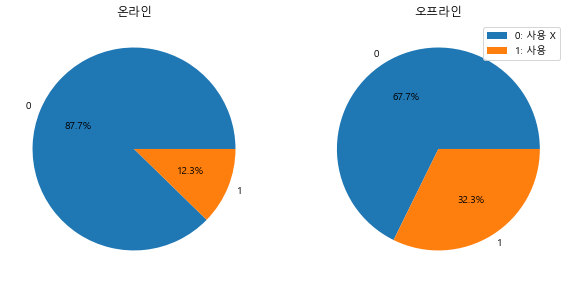

In [298]:
# 온/오프라인에 따른 LPoint 사용 비중
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

pie(ax1, data2.loc[data2['온/오프라인 구분']==1]['LPoint'])
pie(ax2, data2.loc[data2['온/오프라인 구분']==2]['LPoint'])

ax1.set_title('온라인')
ax2.set_title('오프라인')

ax2.legend(['0: 사용 X', '1: 사용'])

plt.show()

- 유통 외 제휴사에서 __오프라인__ 일 때 LPay 사용 비중이 높다.

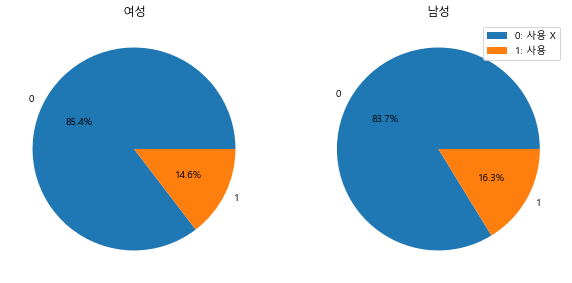

In [299]:
# 고객 성별 비율
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

pie(ax1, data2.loc[data2['고객 성별']=='여성']['LPoint'])
pie(ax2, data2.loc[data2['고객 성별']=='남성']['LPoint'])

ax1.set_title('여성')
ax2.set_title('남성')

ax2.legend(['0: 사용 X', '1: 사용'])

plt.show()

- 유통 외 제휴사에서 성차는 LPay 사용 상 차이가 없다.

In [300]:
# 제휴사 구분 코드에 맞춰 엽종 컬럼 생성
jh = {'A': '유통', 'B': '숙박업종', 'C': '엔터테인먼트', 'D': 'F&B', 'E': '렌탈업종', 'L': '기타 제휴사'}

data2['제휴사'] = data2['제휴사 구분 코드'].apply(lambda x: '비 제휴사' if x=='L01' else jh[x[0]])

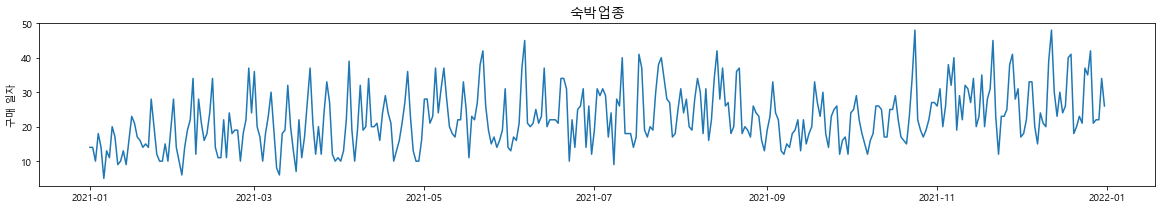

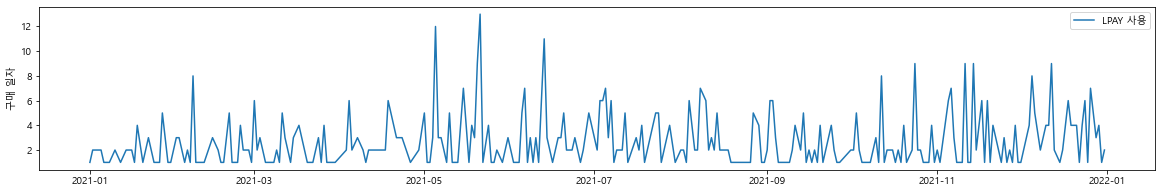

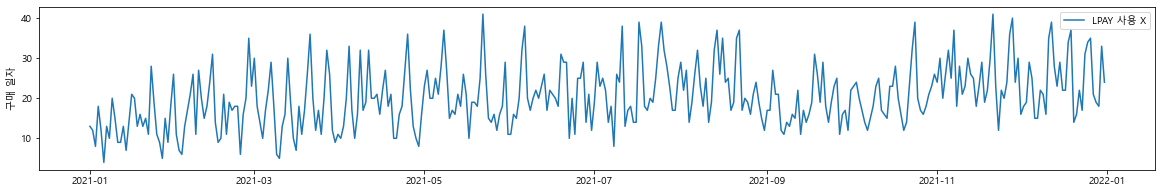

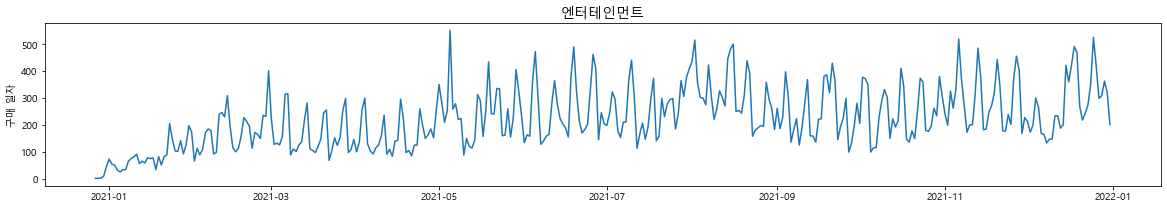

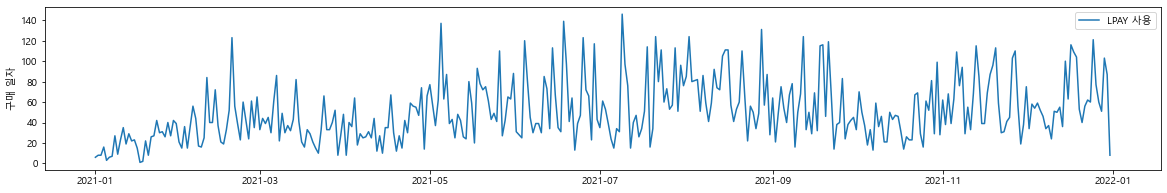

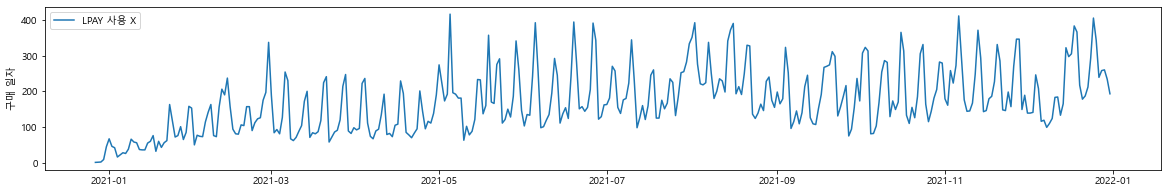

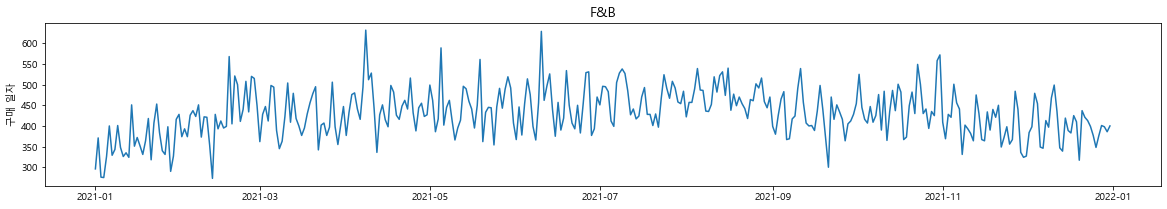

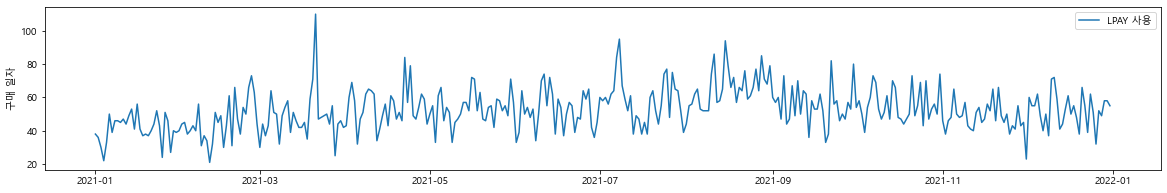

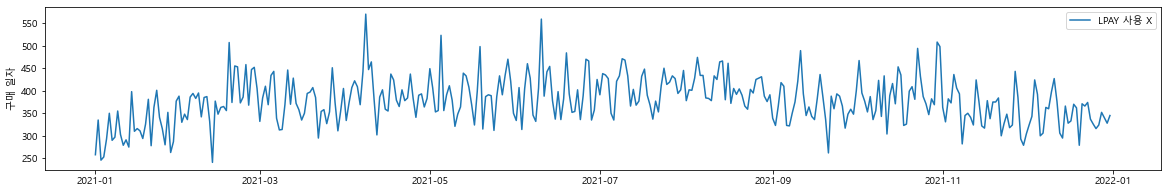

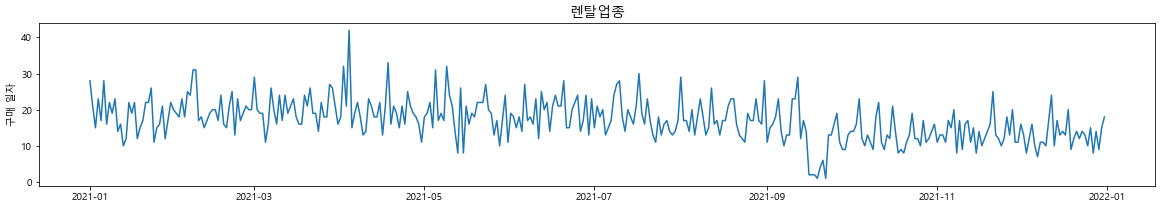

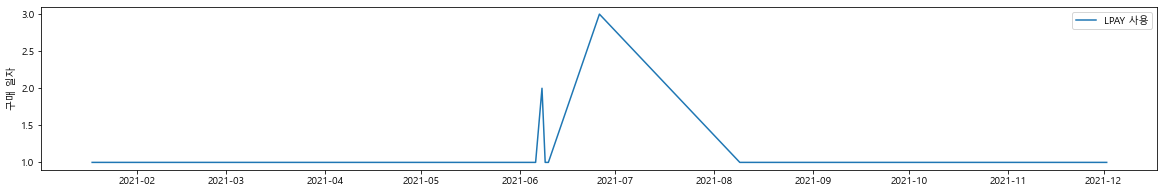

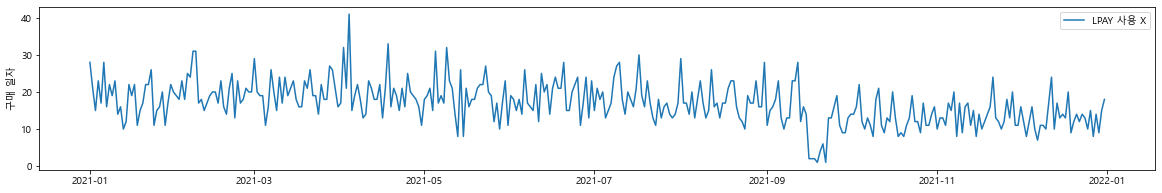

In [301]:
for j in ['숙박업종', '엔터테인먼트', 'F&B', '렌탈업종']:
    plt.figure(figsize=(20, 3))
    plt.title(j, fontsize=14)
    date_counter(data2.loc[data2['제휴사']==j], '구매 일자')

    plt.figure(figsize=(20, 3))
    date_counter(data2.loc[(data2['제휴사']==j)&(data2['LPoint']==1)], '구매 일자')
    plt.legend(['LPAY 사용'])

    plt.figure(figsize=(20, 3))
    date_counter(data2.loc[(data2['제휴사']==j)&(data2['LPoint']==0)], '구매 일자')
    plt.legend(['LPAY 사용 X'])

In [302]:
# 숙박업종
show_date(data2.loc[(data2['제휴사']=='숙박업종')&(data2['LPoint']==1)], 'up', 10)

,구매 일자
2021-05-05,12
2021-05-21,13
2021-06-13,11


In [303]:
# 엔터테인먼트
show_date(data2.loc[(data2['제휴사']=='엔터테인먼트')&(data2['LPoint']==1)], 'up', 130)

,구매 일자
2021-05-05,137
2021-06-18,139
2021-07-09,146
2021-08-28,131


In [304]:
df = dates(data2, '02-01', '03-01')
show_date(df.loc[(df['제휴사']=='엔터테인먼트')&(df['LPoint']==1)], 'up', 100)

,구매 일자
2021-02-19,123


In [305]:
# F&B
show_date(data2.loc[(data2['제휴사']=='F&B')&(data2['LPoint']==1)], 'up', 90)

,구매 일자
2021-03-21,110
2021-07-08,95
2021-08-15,94


### 금액

In [335]:
# 장바구니별 데이터에 금액 정보 추가
df_am_sum = data1.groupby('장바구니 식별 번호')['구매 금액'].sum().to_frame()
df_am_sum = df_am_sum.reset_index()
df1 = df1.merge(df_am_sum, on='장바구니 식별 번호')

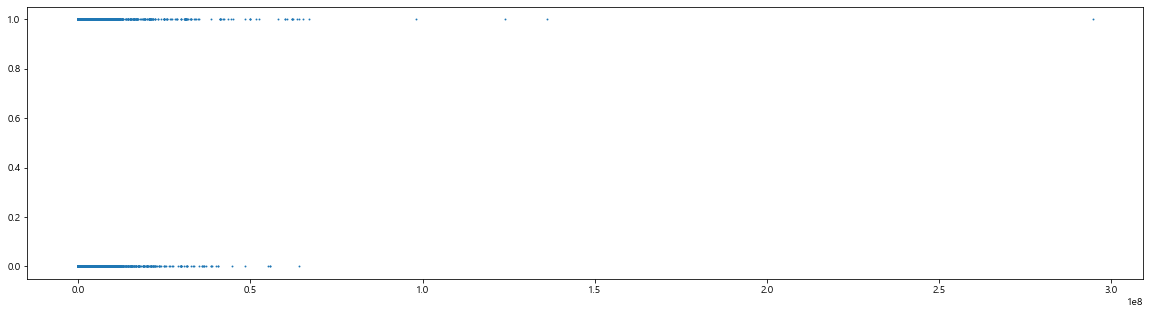

In [307]:
plt.figure(figsize=(20, 5))
plt.scatter(df1['구매 금액'], df1['LPoint'], s=0.8)

<AxesSubplot:xlabel='고객 거주 지역 대분류 코드', ylabel='count'>

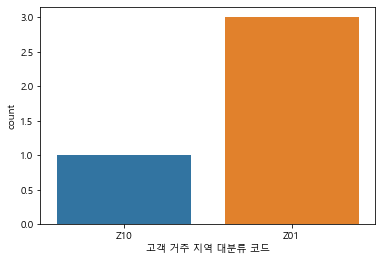

In [308]:
# 9천만 원 이상 구매 고객 거주 지역
sns.countplot(data=df1.loc[df1['구매 금액']>90000000], x='고객 거주 지역 대분류 코드')

- 이상치로 9천 만 원 이상 구매 한 고객 4명 중 3명이 Z01 지역에 거주한다.   
(전체 분포 순위: Z17, Z10, Z16)

In [309]:
df1['금액대'] = df1['구매 금액'].apply(cut_amount)

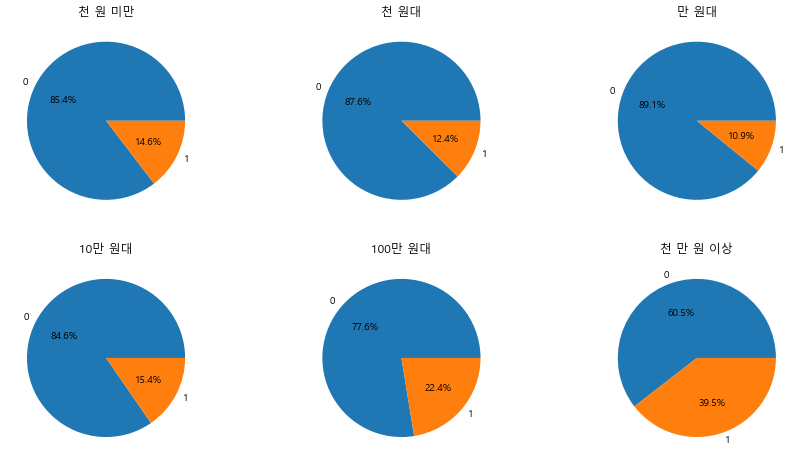

In [310]:
plt.figure(figsize=(15, 8))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    pie(ax, df1.loc[df1['금액대']==am_idx[i]]['LPoint'])
    ax.set_title(f'{am_idx[i]}')

- 10만원 미만 구매에서는 가격대가 올라갈 수록 LPay 사용 비중이 낮아진다
- 10만원 이상 구매에서는 가격대가 올라갈 수록 LPay 사용 비중이 높아진다.

In [328]:
# 제휴사 구분 추가
jh = {'A': '유통', 'B': '숙박업종', 'C': '엔터테인먼트', 'D': 'F&B', 'E': '렌탈업종', 'L': '기타 제휴사'}
lpay_cust['제휴사 구분'] = lpay_cust['cop_c'].apply(lambda x: '비 제휴사' if x=='L01' else jh[x[0]])

In [361]:
# 구매 금액과 lpay이용 금액 병합
df = lpay_cust.loc[lpay_cust['제휴사 구분']=='유통'][['cust', 'cop_c', '제휴사 구분', 'de_dt', 'de_hr', 'buy_am']]
df.columns = ['고객 분류', '제휴사 구분 코드', '제휴사 구분', '구매 일자', '구매 시간', '이용 금액']
df_cc = pd.merge(df, df1.loc[df1['LPoint']==1], on=['고객 분류', '제휴사 구분 코드', '구매 일자', '구매 시간'])

In [362]:
# 비율이 1이 넘는 행 제거
df_cc['이용 비율'] = df_cc['이용 금액']/df_cc['구매 금액']
drop = df_cc.loc[df_cc['이용 비율']>1].index
df_cc = df_cc.drop(drop)

<AxesSubplot:>

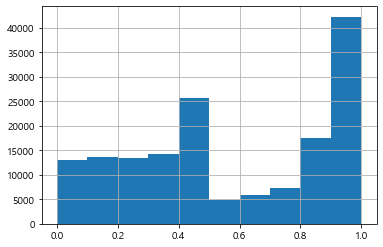

In [363]:
df_cc['이용 비율'].hist()

- 전체 금액의 약 50%, 100% 비중으로 lpay 결제를 이용함

# 3. 제휴사

In [364]:
JEHUE = pd.read_csv('data/JEHUE.csv')
JEHUE

,사용처,LPOINT,사용처 분류,온라인,오프라인,제휴사 구분
0,피자헛,1,외식,1.0,0.0,NaN
1,인스타워시,1,여가,1.0,0.0,NaN
2,롯데월드 어드벤처 부산,1,여가,1.0,1.0,NaN
3,(주)브리치,0,쇼핑,1.0,0.0,NaN
4,11번가,1,쇼핑,1.0,0.0,NaN
...,...,...,...,...,...,...
146,허그맘,1,교육/문화,0.0,1.0,NaN
147,호텔스닷컴,1,여가,1.0,0.0,NaN
148,환경부 전기차 충전소,1,여가,1.0,1.0,NaN
149,후지필름몰,1,쇼핑,1.0,0.0,NaN
